# <b>Overview of the Project</b>
- Recognize fraudulent credit card transactions


### Datasets:
- Contains transactions made by credit cards in September 2013 by european cardholders.(2 days)
- It contains only numerical input variables which are the result of a PCA transformation.
- Features V1, V2, ... V28 are the principal components obtained with PCA due to confidentiality issues.(cannot provide actual data)


## <b> Part 1: Data analysis</b>


Import necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
LABELS = ["Normal","Fraud"]

Read CSV file

In [2]:
data = pd.read_csv('data/creditcard.csv')

Analyze the data

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

See if any null? To do preprocess

In [5]:
data.isnull().values.any()

False

Plot bar graph for normal and fraud transaction

Text(0, 0.5, 'Frequency')

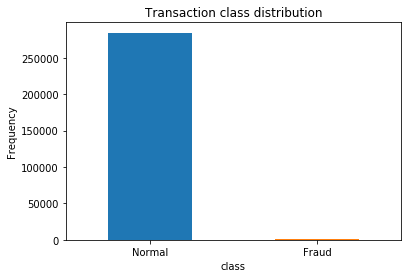

In [6]:
count_classes=pd.value_counts(data['Class'], sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2),LABELS)
plt.xlabel("class")
plt.ylabel("Frequency")

Hence we can see that our data is imbalanced

### <b>Further analysis</b>

In [7]:
#Assign 1 for fraud and 0 for normal transaction
fraud =data[data['Class']==1]
normal =data[data['Class']==0]

In [8]:
#Printing shape
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [9]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

plot histogram

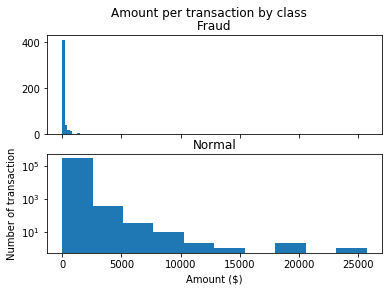

In [11]:
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transaction by class')
ax1.hist(fraud.Amount)
ax1.set_title('Fraud')
ax2.hist(normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of transaction')
plt.yscale('log')
plt.show();

Let us see our data

In [12]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


To analyze the percentage of fraud and normal transacation

In [13]:
print( round(data['Class'].value_counts()[0]/len(data) * 100,3), '% of the dataset are not frauds')
print( round(data['Class'].value_counts()[1]/len(data) * 100,3), '% of the dataset are frauds')

99.827 % of the dataset are not frauds
0.173 % of the dataset are frauds


So, we conclude:
- The dataset is highly unbalanced, the positive class (frauds) account for 0.173% of all transactions.
- The data is clean i.e. no null value.
- Features V1, V2, ... V28 are the principal components obtained with PCA.
- 'Time' and 'Amount' are real. They have not been transformed.
- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## <b> Part 2: To measure accuracy of the transactions </b>

Noticed:
- Original dataset imbalanced(Most of the transactions are non-fraud)
- If we use this as our base dataset then:
  - we might get a lot of errors and our algorithms will probably overfit.
  - As it will "assume" that most transactions are not fraud
  
<b>But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!</b>

#### Problems
- <b>Overfitting</b>: model assumes there is no fraud
- <b>Wrong Correlations</b>: By having an imbalance dataframe we are not able to see the true correlations between the class and features.

Two key points to understand

##### <b>1.Sub Sample</b>

In this scenario, our subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. Meaning our sub-sample will have the same amount of fraud and non fraud transactions.

##### <b>2.Outlier Detection & Removal</b>


In [14]:
#Scaling amount 
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
data['Amount_Stand'] = std_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
#df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
data = data.drop(['Time', 'Amount'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Stand
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [15]:
#Resampling
X = data.drop('Class', axis=1)
y = data.Class

This method uses synthetic data generation to increase the number of samples in the data set.

In [16]:
from imblearn.over_sampling import SMOTE
X_resample, y_resample = SMOTE().fit_sample(X, y)
print('The number of transactions after resampling : ' + str(len(X_resample)))
print('If the number of frauds is equal to the number of normal tansactions? ' + str(sum(y_resample == 0) == sum(y_resample == 1)))

The number of transactions after resampling : 568630
If the number of frauds is equal to the number of normal tansactions? True


<b>Using Machine Learning</b>

We will apply 6 machine learning algorithms for classification in this section. Since we have already resampled the dataset, the area under the ROC curve will be used to evaluate which algorithm performs the best. Our result shows that the MLPClassifier returned the greatest AUC value.

Algorithms: Logistic regression, Naive Bayes, Decision tree, Random forest, Quadratic discriminant analysis, Neural network (MLP)

- Since, Confusion matrix accuracy is not meaningful for unbalanced classification.
- We measure the accuracy using the Area Under the Precision-Recall Curve (AUPRC).

A precision-recall curve shows the relationship between precision (= positive predictive value) and recall (= sensitivity) for every possible cut-off. 
- How relevant are the retrieved results? (precision)
- Did the system retrieve many of the truly relevant documents? (recall)

So,
- A good way to characterize the performance of a classifier is to look at how precision and recall change as you change the threshold.(its precision will stay high as recall increases.)
- A poor classifier will have to take a large hit in precision to get higher recall.

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score ,auc, roc_curve,recall_score
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, neural_network

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=3)

In [23]:
MLA = [
    linear_model.LogisticRegressionCV(),
    naive_bayes.GaussianNB(),
    tree.DecisionTreeClassifier(max_depth=3),
    ensemble.RandomForestClassifier(max_depth=3, n_estimators=10, max_features=1),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    neural_network.MLPClassifier(alpha=1)
]

In [24]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index,'Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)
    
    row_index+=1
MLA_compare.sort_values(by = ['AUC'], ascending = False, inplace = True)
MLA_compare

/home/adhikari/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


,MLA Name,Precision,Recall,AUC
5,MLPClassifier,0.981382,0.969526,0.975512
0,LogisticRegressionCV,0.974018,0.916941,0.946168
2,DecisionTreeClassifier,0.951602,0.917730,0.935388
4,QuadraticDiscriminantAnalysis,0.968578,0.886923,0.928989
3,RandomForestClassifier,0.996852,0.849418,0.923360
1,GaussianNB,0.973181,0.853205,0.914776


## <b> Part 3: Algorithms Used </b>
1. LogisticRegressionCV()
2. GaussianNB()
3. DecisionTreeClassifier
4. RandomForestClassifier
5. QuadraticDiscriminantAnalysis
6. neural_network.MLPClassifier